In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment.Dataset.csv to Sentiment.Dataset.csv


In [ ]:
import pandas as pd



In [ ]:
df = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')

print(df.head)


<bound method NDFrame.head of           textID                                               text sentiment  \
0     f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1     96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2     eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3     01082688c6                                        happy bday!  positive   
4     33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
...          ...                                                ...       ...   
4710  498b85271a   it makes perfect sense. I guess i am very dow...  positive   
4711  814f356244  Finally, im back online! I miss my lappy. So m...  negative   
4712  54277afaa4   sux, I`m thinking of being an accountant. Mad...  negative   
4713  27024dbb18  The sun is shining brightly and the day has ju...  positive   
4714  5e14e7c16e   AM`s good for us GMT-ish people, I think.  Lo...  positive  

In [ ]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            4715 non-null   object 
 1   text              4714 non-null   object 
 2   sentiment         4715 non-null   object 
 3   Time of Tweet     4715 non-null   object 
 4   Age of User       4715 non-null   object 
 5   Country           4715 non-null   object 
 6   Population -2020  4715 non-null   int64  
 7   Land Area (Km²)   4715 non-null   float64
 8   Density (P/Km²)   4715 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 331.6+ KB


In [ ]:
df.isnull().sum()

textID              0
text                1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [ ]:
df.shape

(4715, 9)

In [ ]:
df['sentiment'].value_counts()

neutral     1890
positive    1487
negative    1338
Name: sentiment, dtype: int64

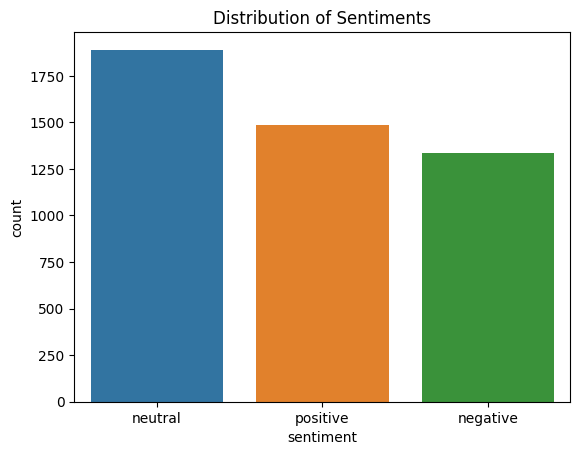

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


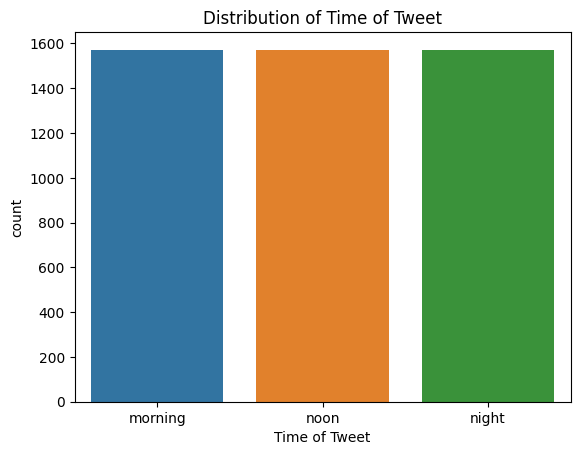

In [ ]:
sns.countplot(x='Time of Tweet', data=df)
plt.title('Distribution of Time of Tweet')
plt.show()


In [ ]:
sentiment_map = {'positive': 0, 'neutral': 1, 'negative': 2}
df['sentiment'] = df['sentiment'].map(sentiment_map)
print(df.head())

       textID                                               text  sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh          1   
1  96d74cb729   Shanghai is also really exciting (precisely -...          0   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...          2   
3  01082688c6                                        happy bday!          0   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!          0   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan          38928346         652860.0   
1          noon       21-30      Albania           2877797          27400.0   
2         night       31-45      Algeria          43851044        2381740.0   
3       morning       46-60      Andorra             77265            470.0   
4          noon       60-70       Angola          32866272        1246700.0   

   Density (P/Km²)  
0               60  
1       

<ipython-input-12-d41c670d8d84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


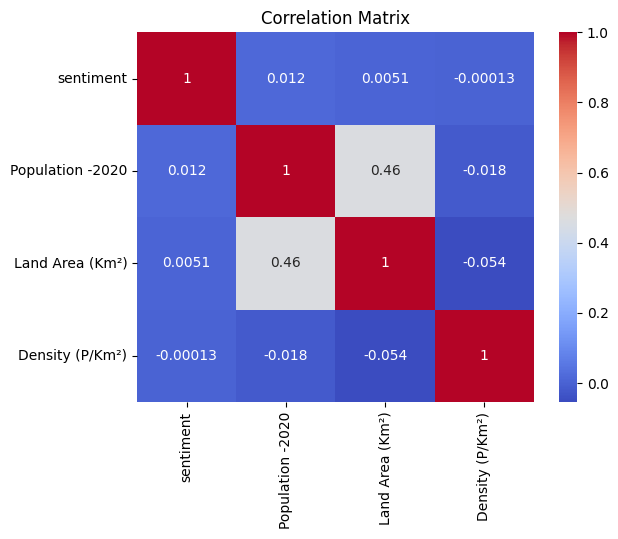

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

def remove_urls(text):

    if isinstance(text, str):
        return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    else:
        return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])


df['text'] = df['text'].apply(lambda x: remove_urls(x) if pd.notna(x) else x)
df['text'] = df['text'].apply(lambda x: remove_punctuation(x) if pd.notna(x) else x)
df['text'] = df['text'].apply(lambda x: remove_stopwords(x) if pd.notna(x) else x)


df.to_csv('preprocessed_dataset.csv', index=False, encoding='utf-8')

print(df.head())


       textID                                               text  sentiment  \
0  f87dea47db                                   Last session day          1   
1  96d74cb729  Shanghai also really exciting precisely skyscr...          0   
2  eee518ae67  Recession hit Veronique Branquinho quit compan...          2   
3  01082688c6                                         happy bday          0   
4  33987a8ee5                                               like          0   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan          38928346         652860.0   
1          noon       21-30      Albania           2877797          27400.0   
2         night       31-45      Algeria          43851044        2381740.0   
3       morning       46-60      Andorra             77265            470.0   
4          noon       60-70       Angola          32866272        1246700.0   

   Density (P/Km²)  
0               60  
1       

In [ ]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score


df = pd.read_csv('preprocessed_dataset.csv', encoding='utf-8')


df = df.dropna(subset=['text'])

X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_counts, y_train)

y_pred_rf = random_forest_model.predict(X_test_counts)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy of RandomForestClassifier: {accuracy_rf * 100:.2f}%")
print(f"Precision of RandomForestClassifier: {precision_rf:.2f}")
print(f"F1 Score of RandomForestClassifier: {f1_rf:.2f}")


Accuracy of RandomForestClassifier: 64.40%
Precision of RandomForestClassifier: 0.67
F1 Score of RandomForestClassifier: 0.64


In [ ]:

import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score


df = pd.read_csv('preprocessed_dataset.csv', encoding='utf-8')


df = df.dropna(subset=['text'])

X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_counts, y_train)

y_pred_nb = naive_bayes_model.predict(X_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Accuracy of Naive Bayes Classifier: {accuracy_nb * 100:.2f}%")
print(f"Precision of Naive Bayes Classifier: {precision_nb:.2f}")
print(f"F1 Score of Naive Bayes Classifier: {f1_nb:.2f}")



Accuracy of Naive Bayes Classifier: 60.04%
Precision of Naive Bayes Classifier: 0.61
F1 Score of Naive Bayes Classifier: 0.60


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import get_linear_schedule_with_warmup


df = pd.read_csv('preprocessed_dataset.csv', encoding='utf-8')


df = df.dropna(subset=['text'])

X = df['text']
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = int(self.labels.iloc[idx])
        inputs = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': torch.tensor(label)
        }


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_dataset = SentimentDataset(X_train, y_train, tokenizer)
test_dataset = SentimentDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

num_train_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_train_steps)

best_accuracy = 0.0
best_model = None



for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']


        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']

            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = np.argmax(logits, axis=1)
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy_bert = accuracy_score(all_labels, all_preds)
    precision_bert = precision_score(all_labels, all_preds, average='weighted')
    f1_bert = f1_score(all_labels, all_preds, average='weighted')

    print(f"Epoch {epoch + 1}:")
    print(f"Accuracy of BERT Model: {accuracy_bert * 100:.2f}%")
    print(f"Precision of BERT Model: {precision_bert:.2f}")
    print(f"F1 Score of BERT Model: {f1_bert:.2f}")


    if accuracy_bert > best_accuracy:
        best_accuracy = accuracy_bert
        best_model = model.state_dict()
        torch.save(best_model, 'best_sentiment_model_accuracy.pth')
        print("Best model saved based on accuracy!")

if best_model is not None:
    torch.save(best_model, 'best_sentiment_model_validation_accuracy.pth')
    print("Best model saved based on validation accuracy!")

print(f"Best Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Precision: {precision_bert:.2f}")
print(f"Best F1 Score: {f1_bert:.2f}")
print("Training completed.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1:
Accuracy of BERT Model: 67.38%
Precision of BERT Model: 0.70
F1 Score of BERT Model: 0.68
Best model saved based on accuracy!
Epoch 2:
Accuracy of BERT Model: 71.52%
Precision of BERT Model: 0.72
F1 Score of BERT Model: 0.72
Best model saved based on accuracy!
Epoch 3:
Accuracy of BERT Model: 71.20%
Precision of BERT Model: 0.72
F1 Score of BERT Model: 0.71
Best model saved based on validation accuracy!
Best Accuracy: 71.52%
Best Precision: 0.72
Best F1 Score: 0.71
Training completed.


In [ ]:
pip install onnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 30.9 MB/s eta 0:00:00


In [ ]:
pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import get_linear_schedule_with_warmup
import onnx
import onnxruntime


df = pd.read_csv('preprocessed_dataset.csv', encoding='utf-8')


df = df.dropna(subset=['text'])

X = df['text']
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = int(self.labels.iloc[idx])
        inputs = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': torch.tensor(label)
        }


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


train_dataset = SentimentDataset(X_train, y_train, tokenizer)
test_dataset = SentimentDataset(X_test, y_test, tokenizer)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.load_state_dict(torch.load('best_sentiment_model_validation_accuracy.pth'))


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


onnx_filename = 'bert_sentiment_model.onnx'
dummy_input = {
    'input_ids': torch.zeros(1, 128, dtype=torch.long).to(device),
    'attention_mask': torch.zeros(1, 128, dtype=torch.long).to(device),
}


dynamic_axes = {'input_ids': {0: 'batch_size', 1: 'sequence_length'},
                'attention_mask': {0: 'batch_size', 1: 'sequence_length'}}


torch.onnx.export(model, (dummy_input['input_ids'], dummy_input['attention_mask']),
                  onnx_filename, verbose=True,
                  input_names=['input_ids', 'attention_mask'],
                  output_names=['output'],
                  dynamic_axes=dynamic_axes)


ort_session = onnxruntime.InferenceSession(onnx_filename)


all_preds_onnx = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].cpu().numpy()
        attention_mask = batch['attention_mask'].cpu().numpy()

        ort_inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
        ort_outs = ort_session.run(None, ort_inputs)
        logits_onnx = torch.tensor(ort_outs[0])
        preds_onnx = np.argmax(logits_onnx, axis=1)
        all_preds_onnx.extend(preds_onnx.tolist())


accuracy_onnx = accuracy_score(y_test, all_preds_onnx)
precision_onnx = precision_score(y_test, all_preds_onnx, average='weighted')
f1_onnx = f1_score(y_test, all_preds_onnx, average='weighted')

print("\nMetrics for the ONNX Model:")
print(f"Accuracy of ONNX Model: {accuracy_onnx * 100:.2f}%")
print(f"Precision of ONNX Model: {precision_onnx:.2f}")
print(f"F1 Score of ONNX Model: {f1_onnx:.2f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Metrics for the ONNX Model:
Accuracy of ONNX Model: 71.20%
Precision of ONNX Model: 0.72
F1 Score of ONNX Model: 0.71


In [ ]:
import onnxruntime
from transformers import BertTokenizer
import torch

onnx_filename = 'bert_sentiment_model.onnx'
ort_session = onnxruntime.InferenceSession(onnx_filename)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


sentiment_mapping = {
    0: 'Positive',
    1: 'Neutral',
    2: 'Negative'
}


def predict_sentiment(sentence):

    inputs = tokenizer(sentence, truncation=True, padding='max_length', max_length=128, return_tensors='pt')


    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)


    ort_inputs = {'input_ids': input_ids.cpu().numpy(), 'attention_mask': attention_mask.cpu().numpy()}
    ort_outs = ort_session.run(None, ort_inputs)
    logits_onnx = torch.tensor(ort_outs[0])


    preds_onnx = torch.argmax(logits_onnx, axis=1).item()

    sentiment = sentiment_mapping.get(preds_onnx, 'unknown')

    return sentiment


user_input = input("Enter a sentence for sentiment analysis: ")

predicted_sentiment = predict_sentiment(user_input)

print(f"Predicted Sentiment: {predicted_sentiment}")


Enter a sentence for sentiment analysis: Allah protect us from every danger.
Predicted Sentiment: Positive
